<div style="background-color:white">
    <img src="./imgs/hindi_hw_digits.png" />
</div>

In [1]:
import warnings

warnings.simplefilter("ignore")

import torch
import torch.nn as nn

from torch.utils.data import *

import torchvision
from torchvision import transforms

from sklearn.metrics import accuracy_score

from ml_utils import *
from hindi.datasets import Digits

In [2]:
set_seed( 5842 )

batch_size = 32

img_transformer = transforms.Compose([
                        transforms.Grayscale(),
                        transforms.ToTensor()
                    ])

train_dataset = Digits( "./data", train=True, transform=img_transformer, download=True )

test_dataset = Digits( "./data", train=False, transform=img_transformer, download=True )

train_loader = DataLoader( train_dataset, batch_size=batch_size, shuffle=True )

test_loader = DataLoader( test_dataset, batch_size=batch_size )

Random seed set as 5842


In [3]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )

loss_func = nn.CrossEntropyLoss()

input_channels = 1

classes = 10

filters = 16

kernel_size = 3

padding = kernel_size//2

pool_size = 2

original_pixels_per_channel = 32*32

<div style="background-color:white">
    <img src="arch_imgs/Three_Convs_No_BN.png" width="35%" height="35%"/>
</div>

In [4]:
three_convs_model = nn.Sequential(
                                    nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
        
                                    nn.Flatten(), # 16x16x16 => 4096
                                    nn.Linear( 4096, classes) # 1024 => 10
                                )

In [5]:
three_convs_model_results_df = train_model( 
                                            three_convs_model,
                                            loss_func, 
                                            train_loader, 
                                            test_loader=test_loader, 
                                            score_funcs={'accuracy': accuracy_score}, 
                                            device=device, 
                                            epochs=30,
                                            capture_conv_sample_weights=True, 
                                            conv_index=4, 
                                            wx_flt_index=3, 
                                            wx_ch_index=4, 
                                            wx_ro_index=1, 
                                            wx_index=0,
                                            wy_flt_index=3,
                                            wy_ch_index=8, 
                                            wy_ro_index=1, 
                                            wy_index=0
                                         )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [07:30<00:00, 15.00s/it]


In [6]:
three_convs_model_results_df.head()

,epoch,total time,train loss,wx,wy,test loss,train accuracy,test accuracy
0,0,15.430224,2.118166,-0.038930,-0.047021,1.292461,0.406647,0.816000
1,1,27.055064,0.513233,-0.038917,-0.047021,0.317979,0.878882,0.900667
2,2,38.824923,0.275158,-0.038913,-0.047021,0.274504,0.919353,0.914667
3,3,50.463895,0.235627,-0.038909,-0.047021,0.388805,0.926824,0.869667
4,4,62.069217,0.214261,-0.038904,-0.047021,0.219184,0.934941,0.929667


<div style="background-color:white">
    <img src="arch_imgs/Three_Convs_Wth_BN.png" width="35%" height="35%"/>
</div>

In [7]:
three_convs_wth_bn_model = nn.Sequential(
                                            nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
                
                                            nn.Flatten(), # 16x16x16 => 4096
                                            nn.Linear( 4096, classes) # 4096 => 10
                                    )

In [8]:
three_convs_wth_bn_model_results_df = train_model( 
                                                    three_convs_wth_bn_model,
                                                    loss_func, 
                                                    train_loader, 
                                                    test_loader=test_loader, 
                                                    score_funcs={'accuracy': accuracy_score}, 
                                                    device=device, 
                                                    epochs=30,
                                                    capture_conv_sample_weights=True, 
                                                    conv_index=6, 
                                                    wx_flt_index=3, 
                                                    wx_ch_index=4, 
                                                    wx_ro_index=1, 
                                                    wx_index=0,
                                                    wy_flt_index=3,
                                                    wy_ch_index=8, 
                                                    wy_ro_index=1, 
                                                    wy_index=0
                                                 )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [08:14<00:00, 16.48s/it]


In [9]:
three_convs_wth_bn_model_results_df.head()

,epoch,total time,train loss,wx,wy,test loss,train accuracy,test accuracy
0,0,15.296440,0.629183,-0.072049,0.044871,0.268866,0.850529,0.940333
1,1,29.910650,0.213117,-0.071051,0.045519,0.168181,0.952824,0.964000
2,2,44.532239,0.143794,-0.070272,0.045912,0.126987,0.970000,0.973000
3,3,59.457923,0.111893,-0.069635,0.046100,0.104219,0.975765,0.979333
4,4,73.935065,0.092034,-0.069078,0.046369,0.088827,0.980294,0.982000


In [10]:
print( "Three Convs No BN Model Test Accuracy: {}".format( three_convs_model_results_df[ 'test accuracy' ].iloc[-1] ) )
print( "Three Convs With BN Model Test Accuracy: {}".format( three_convs_wth_bn_model_results_df[ 'test accuracy' ].iloc[-1] ) )

Three Convs No BN Model Test Accuracy: 0.924
Three Convs With BN Model Test Accuracy: 0.9913333333333333


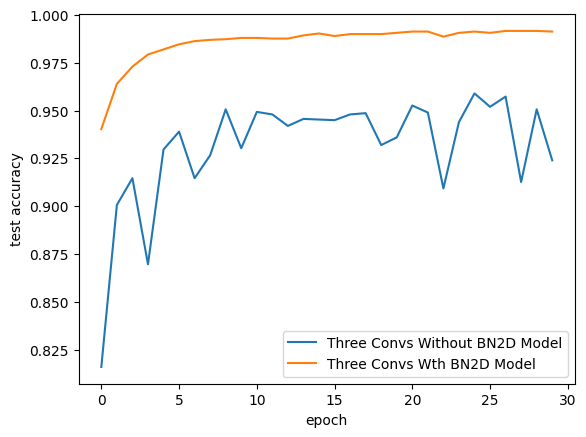

In [11]:
sns.lineplot( x='epoch', y='test accuracy', data=three_convs_model_results_df, label="Three Convs Without BN2D Model" )
sns.lineplot( x='epoch', y='test accuracy', data=three_convs_wth_bn_model_results_df, label="Three Convs Wth BN2D Model" )
plt.savefig( 'imgs/three_convs_test_accuracy_plots.png' )

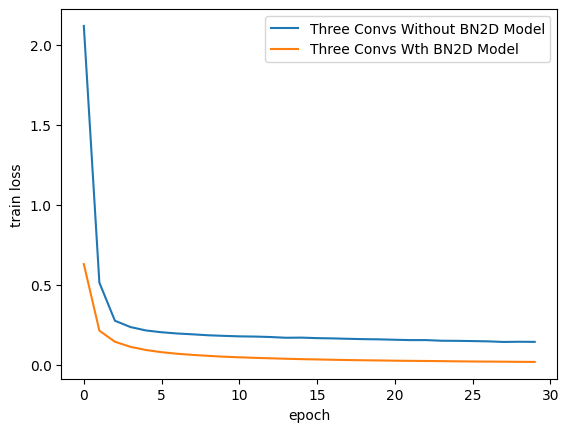

In [12]:
sns.lineplot( x='epoch', y='train loss', data=three_convs_model_results_df, label="Three Convs Without BN2D Model" )
sns.lineplot( x='epoch', y='train loss', data=three_convs_wth_bn_model_results_df, label="Three Convs Wth BN2D Model" )
plt.savefig( 'imgs/three_convs_training_convergence_plots.png' )

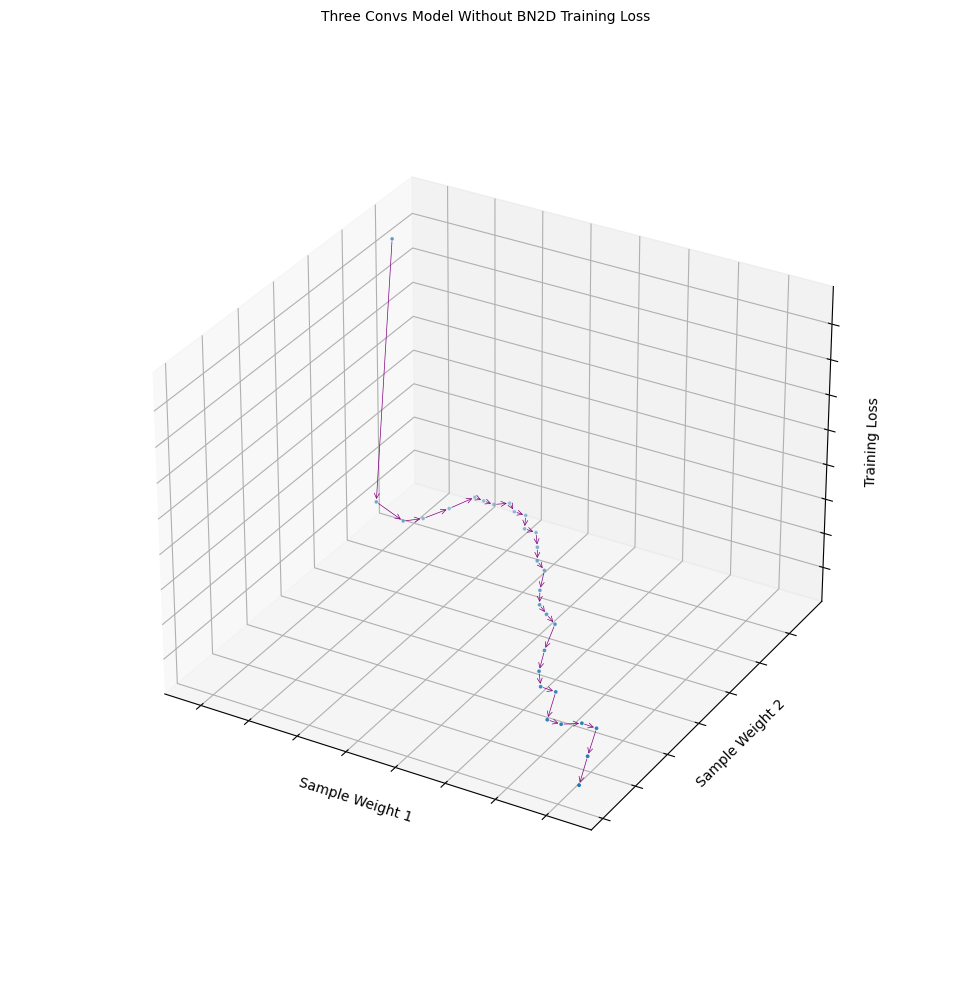

In [13]:
fig = draw_loss_descent( three_convs_model_results_df, title='Three Convs Model Without BN2D Training Loss' )
fig.savefig( 'imgs/three_convs_model_contour.png' )

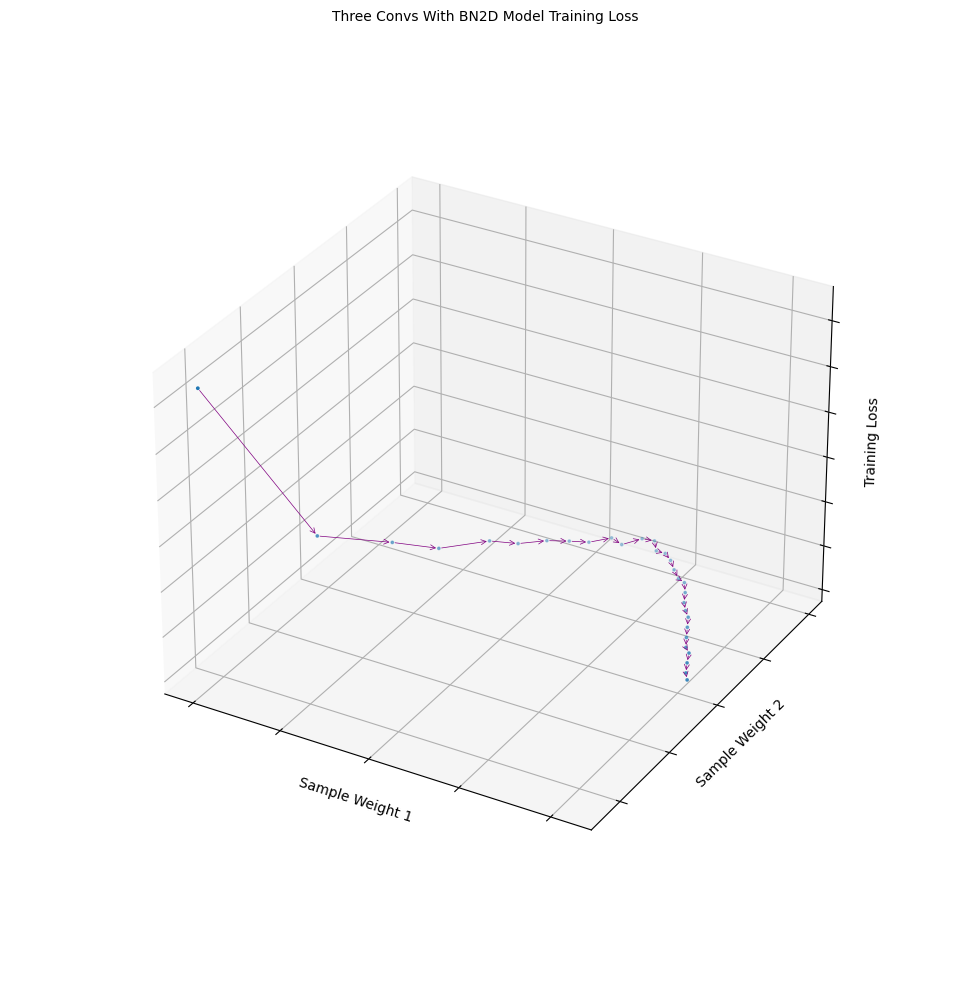

In [14]:
fig = draw_loss_descent( three_convs_wth_bn_model_results_df, title='Three Convs With BN2D Model Training Loss' )
fig.savefig( 'imgs/three_convs_wth_bn_model_contour.png' )

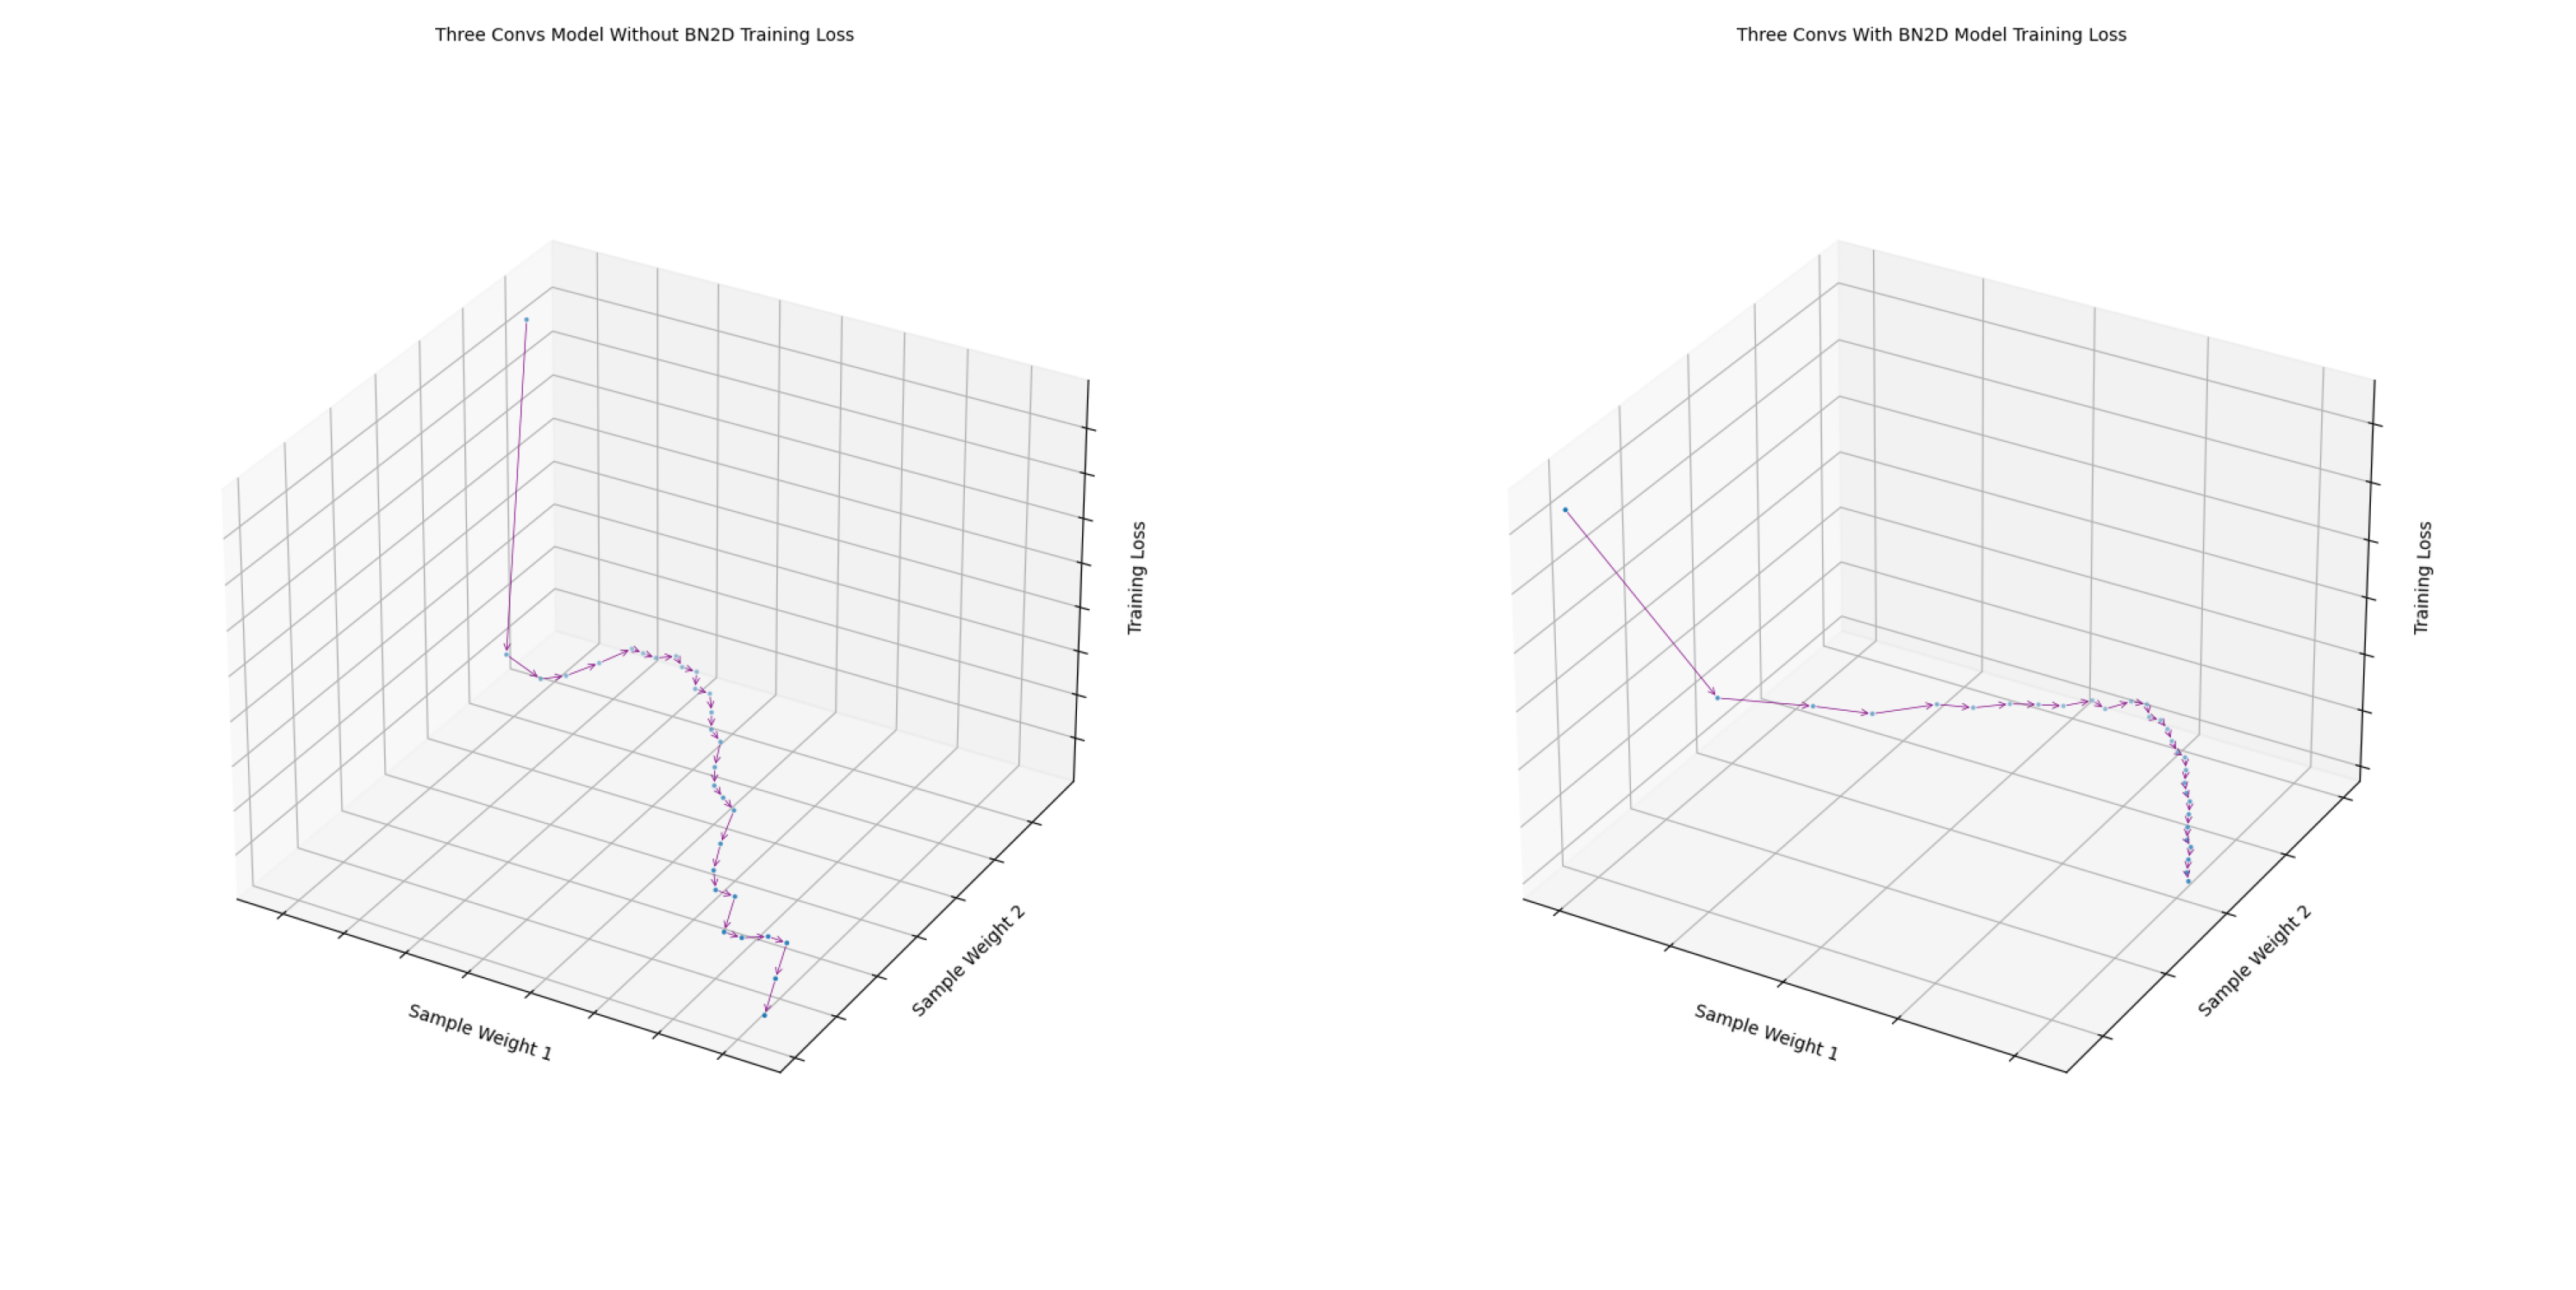

In [16]:
fig, axarr = plt.subplots( 1, 2 )

fig.set_figheight( 20 )

fig.set_figwidth( 30 )

image = plt.imread( "imgs/three_convs_model_contour.png" )

axarr[ 0 ].imshow( image )
axarr[ 0 ].set_axis_off()

image = plt.imread( "imgs/three_convs_wth_bn_model_contour.png" )

axarr[ 1 ].imshow( image )
axarr[ 1 ].set_axis_off()

fig.tight_layout()

plt.savefig( 'imgs/training_convergence_plots.png' )